In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [30]:
def F(t,U):
    # dU/dt = F(t,U)
    # U[0] = x, U[1] = y
    #return np.array([-1.*U[0]+0.9*U[0]*U[1], 2.*U[1]-1.2*U[0]*U[1]])
    return np.array([U[0]*(5-2*U[0])])

In [31]:
def euler(t,tf,h,U,func):
    Uv = []
    tv = [t]
    Uv.append(np.array(U,dtype=float))
    while t <= tf:
        k1 = h*func(t, U)
        U += k1
        t += h
        Uv.append(np.array(U,dtype=float))
        tv.append(t)
    return tv, Uv

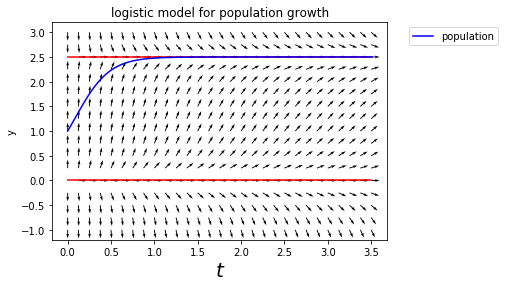

In [44]:
#set the dimensions of the window for the slope field
x = np.linspace(0, 3.5, 29) # Locations of x-coordinates
y = np.linspace(-1, 3, 17) # Locations of y-coordinates
xx, yy = np.meshgrid(x, y) # meshgrid returns two 2D arrays

#set the functions
u = xx          # dx/dt
v = yy*(5-2*yy) # dy/dt = y(5-2p)

#plot equations
n = np.sqrt(u**2+v**2)+np.finfo(float).eps # add machine zero to avoid division by 0 (hack) - normalizes the arrows
plt.quiver(x, y, u/n, v/n, color='black') # Plot the vector field

#horizontal lines for equilibria
x_coordinates = [0, 3.5]
y_coordinates = [0, 0]
plt.plot(x_coordinates, y_coordinates, 'r')

x_coordinates = [0, 3.5]
y_coordinates = [2.5, 2.5]
plt.plot(x_coordinates, y_coordinates, 'r')


#add details to graph
plt.xlabel('x') # Add a label for the x-axis
plt.ylabel('y') # Add a label for the y-axis
plt.title('logistic model for population growth') # Add a title

# Solve the system
t0, tf, h = 0, 3.5, 0.01
#U0 = [0.5, 1.]
U0 = [1]
t, U = euler(t0,tf,h,U0,F)
pred = np.array(U)[:,0]
#prey = np.array(U)[:,1]
#fig, ax = plt.subplots()
plt.plot(t,pred,'b',label='population')
#ax.plot(t,prey,'b',label='Prey')
plt.xlabel('$t$',size=20)
plt.legend(bbox_to_anchor=(1.05,1),loc=2);

#plt.show() # Finally, show the figure

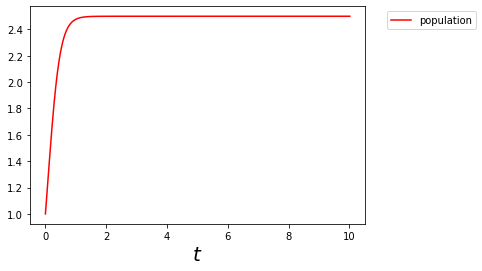

In [45]:
# Solve the system
t0, tf, h = 0, 10, 0.01
#U0 = [0.5, 1.]
U0 = [1]
t, U = euler(t0,tf,h,U0,F)
population = np.array(U)[:,0]
#prey = np.array(U)[:,1]
fig, ax = plt.subplots()
ax.plot(t,population,'r',label='population')
#ax.plot(t,prey,'b',label='Prey')
plt.xlabel('$t$',size=20)
plt.legend(bbox_to_anchor=(1.05,1),loc=2);